In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

def science_plot(fontsize = 9):
    import scienceplots
    plt.style.use(['science','grid','notebook'])
    plt.rcParams.update({
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
        'text.usetex'     : True,        # Use LaTeX for text rendering
        'font.family'     : 'serif'      # Set font family to serif
    })
science_plot()

In [ ]:
# import cv2
# import numpy as np
# import os

# input_folder = "psn_imgs"
# output_folder = "arago_output"
# os.makedirs(output_folder, exist_ok=True)

# # Target output diameter
# target_radius = 100
# target_diameter = target_radius * 2

# def detect_and_warp_ellipse(img_gray):
#     # Blur to smooth noise
#     blurred = cv2.GaussianBlur(img_gray, (9, 9), 0)

#     # Binary threshold to isolate the bright spot
#     _, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)

#     # Find contours
#     contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     if not contours:
#         return img_gray  # fallback if nothing found

#     # Assume largest contour is the spot
#     largest = max(contours, key=cv2.contourArea)
#     if len(largest) < 5:
#         return img_gray  # can't fit ellipse with <5 points

#     # Fit ellipse
#     ellipse = cv2.fitEllipse(largest)
#     (xc, yc), (MA, ma), angle = ellipse

#     # Create a warp that maps ellipse to circle
#     src_pts = cv2.ellipse2Poly((int(xc), int(yc)), (int(MA/2), int(ma/2)), int(angle), 0, 360, 90).astype(np.float32)
#     dst_pts = cv2.ellipse2Poly((target_radius, target_radius), (target_radius, target_radius), 0, 0, 360, 90).astype(np.float32)

#     if src_pts.shape != dst_pts.shape:
#         return img_gray  # skip warping if shape mismatch

#     # Warp using homography
#     H, _ = cv2.findHomography(src_pts, dst_pts)
#     warped = cv2.warpPerspective(img_gray, H, (target_diameter, target_diameter))
#     return warped

# # Process all images
# for filename in os.listdir(input_folder):
#     if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp')):
#         path = os.path.join(input_folder, filename)
#         img = cv2.imread(path)
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#         # Correct elliptical distortion
#         normalized = detect_and_warp_ellipse(gray)

#         # Resize to ensure consistent output
#         normalized = cv2.resize(normalized, (target_diameter, target_diameter))

#         # Save
#         out_path = os.path.join(output_folder, filename)
#         cv2.imwrite(out_path, normalized)

# print("✅ All elliptical spots corrected and saved.")


✅ All elliptical spots corrected and saved.


In [ ]:
# import cv2
# import numpy as np
# import os
# from glob import glob

# def process_arago_shadow(image_path, output_size=256):
#     img = cv2.imread(image_path)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # Enhance contrast
#     clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
#     contrast = clahe.apply(gray)

#     # Blur and threshold to find dark center
#     blur = cv2.GaussianBlur(contrast, (11, 11), 0)
#     _, thresh = cv2.threshold(blur, 60, 255, cv2.THRESH_BINARY_INV)

#     # Morphological cleanup
#     kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
#     closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

#     # Find contours
#     contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     if not contours:
#         return None  # Skip if no contour

#     # Fit ellipse to largest contour (assumed shadow)
#     shadow_contour = max(contours, key=cv2.contourArea)
#     if len(shadow_contour) < 5:
#         return None  # Need at least 5 points for fitEllipse

#     ellipse = cv2.fitEllipse(shadow_contour)
#     (xc, yc), (MA, ma), angle = ellipse

#     # Normalize ellipse to circle
#     src_pts = cv2.ellipse2Poly((int(xc), int(yc)), (int(MA/2), int(ma/2)), int(angle), 0, 360, 90).astype(np.float32)
#     dst_pts = cv2.ellipse2Poly((output_size//2, output_size//2), (output_size//2, output_size//2), 0, 0, 360, 90).astype(np.float32)

#     H, _ = cv2.findHomography(src_pts, dst_pts)
#     warped = cv2.warpPerspective(gray, H, (output_size, output_size))

#     return warped

# # === Batch Process Folder ===
# def batch_process_folder(input_folder, output_folder, output_size=256):
#     os.makedirs(output_folder, exist_ok=True)
#     image_paths = sorted(glob(os.path.join(input_folder, "*.*")))

#     for img_path in image_paths:
#         try:
#             processed = process_arago_shadow(img_path, output_size)
#             if processed is not None:
#                 fname = os.path.basename(img_path)
#                 out_path = os.path.join(output_folder, f"processed_{fname}")
#                 cv2.imwrite(out_path, processed)
#                 print(f"Processed: {fname}")
#             else:
#                 print(f"Skipped (no contour): {img_path}")
#         except Exception as e:
#             print(f"Error processing {img_path}: {e}")

# # === Run this ===
# input_folder = "psn_imgs"      # <- replace this
# output_folder = "psn_imgs_out"    # <- replace this

# batch_process_folder(input_folder, output_folder)


Processed: 20250430_135458.jpg
Processed: 20250430_135536.jpg
Processed: 20250430_135540.jpg
Processed: 20250430_140125.jpg
Processed: 20250430_140127.jpg
Processed: 20250430_140133.jpg
Processed: 20250430_140136 (1).jpg
Processed: 20250430_140136.jpg
Processed: 20250430_140137.jpg
Skipped (no contour): psn_imgs\20250430_140734.jpg
Skipped (no contour): psn_imgs\20250430_140754.jpg
Skipped (no contour): psn_imgs\20250430_140755.jpg
Processed: 20250430_140847.jpg
Processed: 20250430_140848.jpg


In [ ]:
# import os
# import cv2
# from glob import glob

# def grayscale_images(input_folder, output_folder):
#     os.makedirs(output_folder, exist_ok=True)
#     image_paths = sorted(glob(os.path.join(input_folder, "*.*")))

#     for path in image_paths:
#         try:
#             img = cv2.imread(path)
#             gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#             filename = os.path.basename(path)
#             output_path = os.path.join(output_folder, f"gray_{filename}")
#             cv2.imwrite(output_path, gray)

#             print(f"Saved: {output_path}")
#         except Exception as e:
#             print(f"Error processing {path}: {e}")

# # === Set your folder paths here ===
# input_folder = "psn_raw"
# output_folder = "psn_gry"

# grayscale_images(input_folder, output_folder)


Saved: psn_gry\gray_20250430_135458.png
Saved: psn_gry\gray_20250430_135536.png
Saved: psn_gry\gray_20250430_135540.png
Saved: psn_gry\gray_20250430_140133.png
Saved: psn_gry\gray_20250430_140136.png
Saved: psn_gry\gray_20250430_140137.png
Saved: psn_gry\gray_20250430_140734.png
Saved: psn_gry\gray_20250430_140754.png
Saved: psn_gry\gray_20250430_140755.png
Saved: psn_gry\gray_20250430_140848.png


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_intensity_profile(image_path, axis='horizontal', line_position=None, show_plot=True, show_image_with_line=True):
    # Read and convert to grayscale
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise FileNotFoundError(f"Image not found: {image_path}")
    
    height, width = img.shape

    # Default to middle line
    if line_position is None:
        line_position = height // 2 if axis == 'horizontal' else width // 2

    # Extract intensity profile
    if axis == 'horizontal':
        intensity = img[line_position, :]
        label = f'Horizontal profile at y={line_position}'
        x = np.arange(width)
    elif axis == 'vertical':
        intensity = img[:, line_position]
        label = f'Vertical profile at x={line_position}'
        x = np.arange(height)
    else:
        raise ValueError("Axis must be 'horizontal' or 'vertical'.")
    # Show image with red line
    if show_image_with_line:
        plt.figure(figsize=(3, 3), dpi=300)
        plt.imshow(img, cmap='gray')
        if axis == 'horizontal':
            plt.axhline(y=line_position, color='red', linestyle='--', linewidth=1.5)
        else:
            plt.axvline(x=line_position, color='red', linestyle='--', linewidth=1.5)
        # plt.title(f"Line position shown in red ({axis} at {line_position})")
        plt.axis('on')
        plt.tight_layout()
        plt.show()
        
    # Show plot of intensity
    if show_plot:
        plt.figure(figsize=(8, 4))
        plt.plot(x, intensity, color='black')
        plt.title(label)
        plt.xlabel('Pixel position')
        plt.ylabel('Intensity (a.u., Poisson counts)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    return intensity

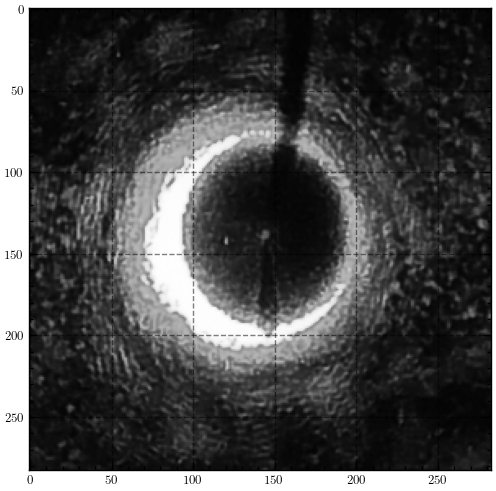

In [82]:
img_psn = cv2.imread(r"psn_gry\gray_20250430_140755.png")
plt.imshow(img_psn)

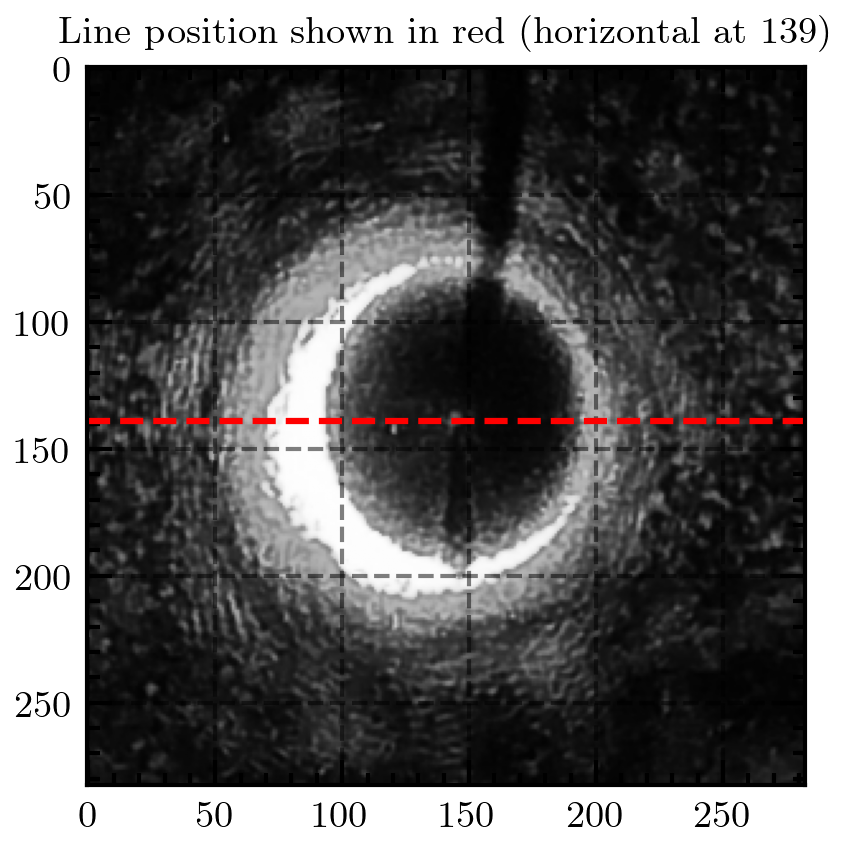

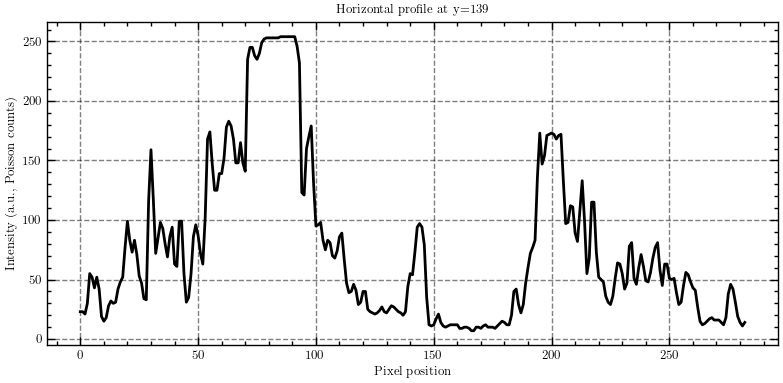

[ 23  23  21  30  55  52  43  52  42  19  15  18  28  32  30  31  42  48
  52  77  99  83  73  83  71  53  47  34  33 116 159 117  72  85  98  93
  80  69  86  94  63  61  99  99  55  31  35  55  86  96  87  72  63 102
 168 174 147 125 125 139 139 152 178 183 179 168 148 148 165 148 141 235
 245 245 238 235 240 249 252 253 253 253 253 253 253 254 254 254 254 254
 254 254 246 232 123 121 160 170 179 131  95  96  98  83  75  83  81  70
  68  74  86  89  67  47  39  40  46  41  29  31  40  40  25  23  22  21
  22  24  27  23  22  25  28  27  25  23  22  20  23  44  55  54  73  94
  97  94  79  35  12  11  12  17  21  14  11  10  11  12  12  12  12   9
   9  10  10   9   7   7  10  10   9  11  12  10  10  10   9  11  13  15
  14  12  12  20  40  42  29  22  29  47  60  72  77  83 136 173 147 154
 171 172 173 172 168 171 172 133  97  98 112 111  89  82 108 133  99  55
  68 115 115  73  52  50  48  36  31  29  36  51  64  63  55  42  47  78
  81  51  46  60  71  61  49  48  56  68  77  81  5

In [83]:
intensity = get_intensity_profile(r"psn_gry\gray_20250430_140755.png", line_position =139, axis='horizontal')
print(intensity)
intelsity1 = intensity

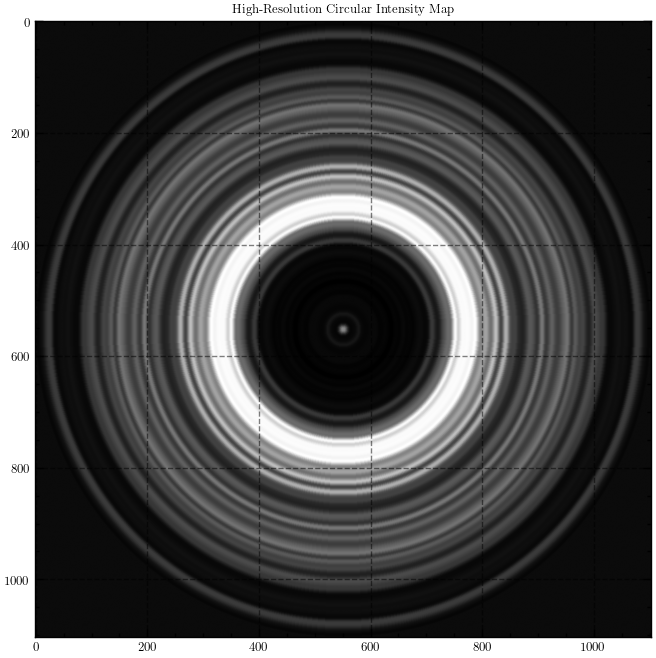

(1104, 1104)


In [44]:
from scipy.interpolate import interp1d
# Original intensity profile
intensity_full = intelsity1 # Replace with your full data
intensity = intensity_full[145:]

# Parameters
upsample_factor = 4  # Increase for higher resolution
original_r = np.arange(len(intensity))
highres_r = np.linspace(0, len(intensity) - 1, len(intensity) * upsample_factor)

# Interpolate intensity to higher resolution
interp_func = interp1d(original_r, intensity, kind='cubic')
highres_intensity = interp_func(highres_r)

# Image size and center
N = len(highres_intensity)
size = N * 2
center = size // 2

# Create coordinate grid
y, x = np.ogrid[:size, :size]
r = np.sqrt((x - center)**2 + (y - center)**2)

# Index into the high-resolution radial array
r_index = np.clip(r.astype(int), 0, N - 1)

# Create circular intensity image
circular_image = highres_intensity[r_index]

# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(circular_image, cmap='gray')
plt.title("High-Resolution Circular Intensity Map")
plt.gca().set_aspect('equal')
plt.show()

print(circular_image.shape)

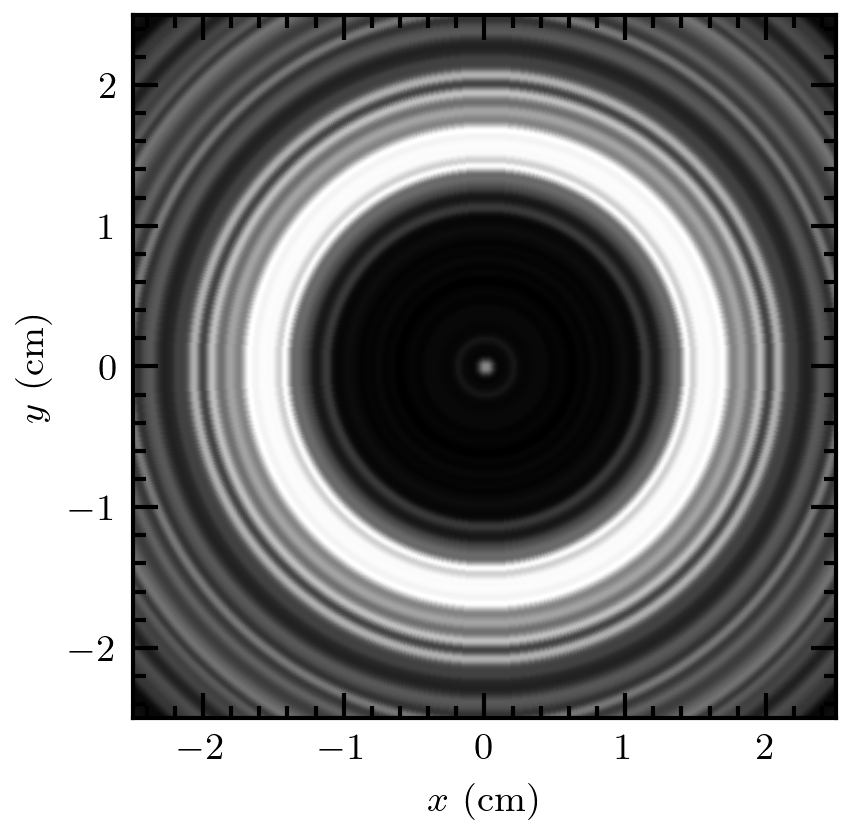

In [76]:
# Plot the image
plt.figure(figsize=(3, 3), dpi = 300)
plt.imshow(circular_image[200:903,200:903], cmap='gray', extent=[-2.5, 2.5, -2.5, 2.5])
plt.gca().set_aspect('equal')
plt.grid()
plt.xlabel("$x$ (cm)")
plt.ylabel("$y$ (cm)")
plt.tight_layout()
plt.savefig("arago_spot_actual.png")
plt.show()


In [60]:
print((904-200)/2)

print(1104/2)
print(552.0/352)
print(2.5*1.5681818181818181)

352.0
552.0
1.5681818181818181
3.9204545454545454


In [65]:
intensity2 = np.concatenate([intensity[::-1], intensity])
intensity2 = intensity2/256
print(len(intensity2))
x = np.linspace(-3.92,3.92,len(intensity2))

276


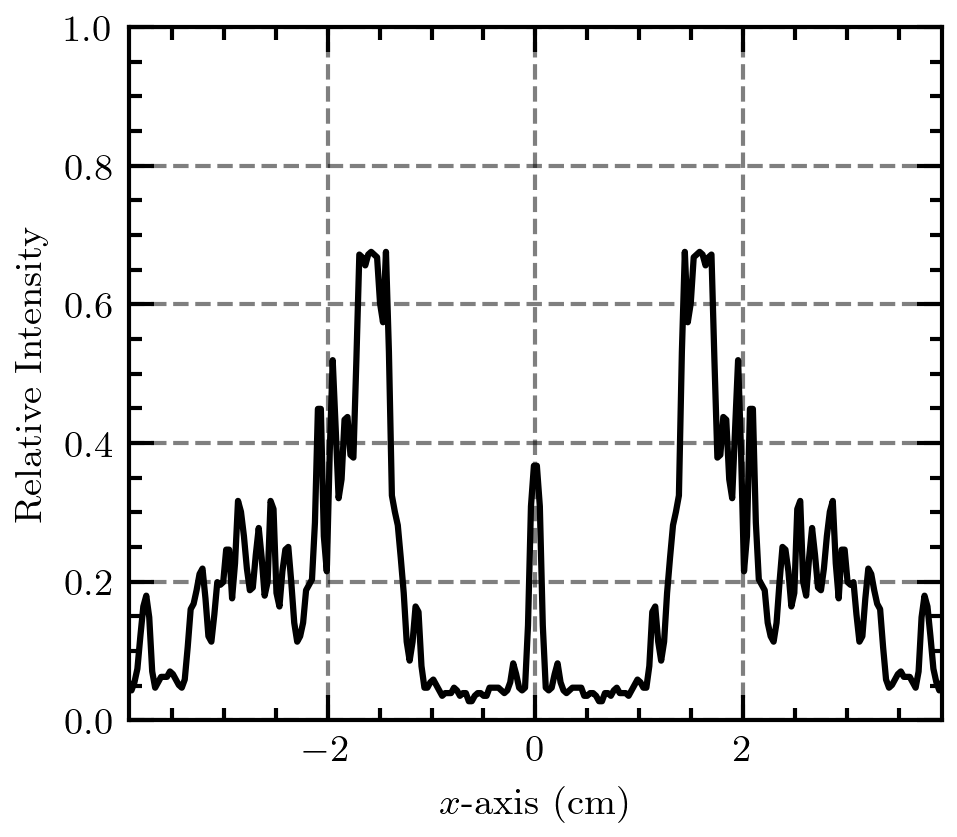

In [84]:
plt.figure(figsize = (3.5,3), dpi=300)
plt.plot(x,intensity2,'k', linewidth = 1.5)
plt.xlim(-3.92, 3.92)
plt.ylim(0,1)
plt.xlabel("$x$-axis (cm)")
plt.ylabel("Relative Intensity")
plt.savefig("arago_spot_actual_intensity.png")
plt.show()


In [85]:
print(1/1.4)
print(0.4/0.7)

0.7142857142857143
0.5714285714285715
